In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Car Price Analysis

* Read in the dataset `car_prices.csv` using the code below.
* Run the info and describe DataFrame methods to get a quick understanding of the data.

In [2]:
cars = pd.read_csv("../Data/car_prices.csv", on_bad_lines='skip')

In [3]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [5]:
cars.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


# Numeric Variable Relationships

Use a pairplot to get a good sense for the relationships between the numeric variables in the dataset.

Turn off the upper corner of the pairplot matrix.

* Why do you think the relationship between `sellingprice` and `mmr` (the recommended selling price) is so strong?
* What is the relationship between `sellingprice` and `year` (the year the car was manufactured). Does this make sense?
* Once you've looked at the two relationships above, filter your dataframe down to the `body` styles ['SUV', 'Sedan', 'Convertible', and 'Coupe']. Color the scatterplot based on values in the `body` column. 

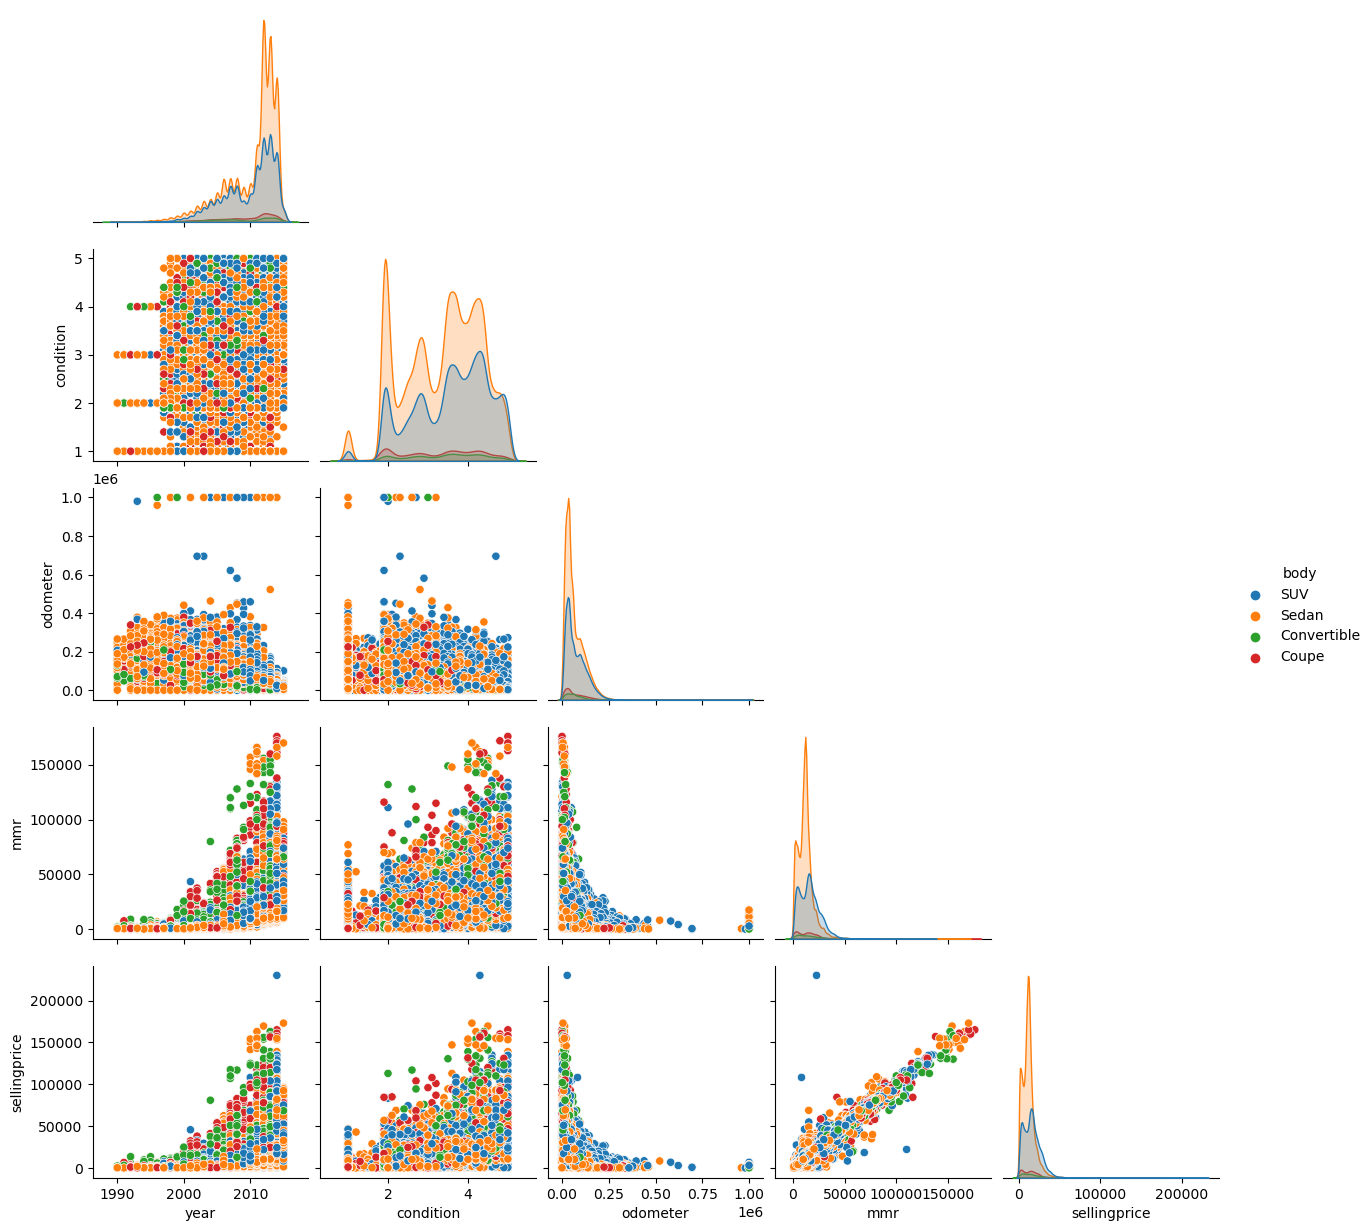

In [6]:
style_list = ["SUV", "Sedan", "Convertible", "Coupe"]

sns.pairplot(cars.query("body in @style_list"),
            corner=True,
            hue='body',
            )

#### Correlation Heat Map

* Plot a heatmap of the correlation between the numeric variables. Does it make sense year and condition and odomoter are negatively correlated?


<Axes: >

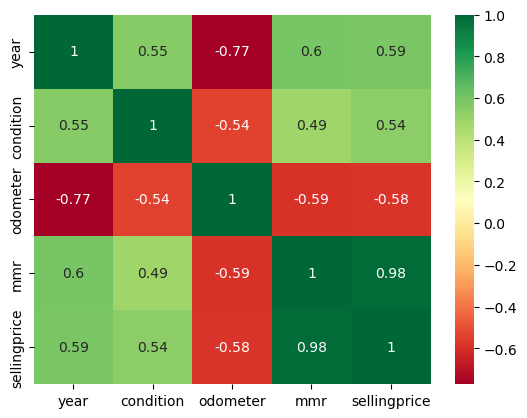

In [7]:
sns.heatmap(cars.corr(numeric_only=True),
           annot=True,
           cmap="RdYlGn"
)

#### Value Retention

* Filter your data down to the following values of `make` (brand): ['Ford', 'BMW', 'Toyota', 'Chevy'] 

* Build a linear relationship plot comparing `odometer` (distance car has travelled) vs. `sellingprice`, broken out by `make`.

* If you want to fit a regression with scipy.stats, use dropna() on the dataframe first.

In [8]:
brand_list = ['Ford', 'BMW', 'Toyota', 'Chevrolet']

car_brands=cars.dropna().query("make in @brand_list")
car_brands.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,3.4,14943.0,black,black,the hertz corporation,69000,65000,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900,9800,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300,17500,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


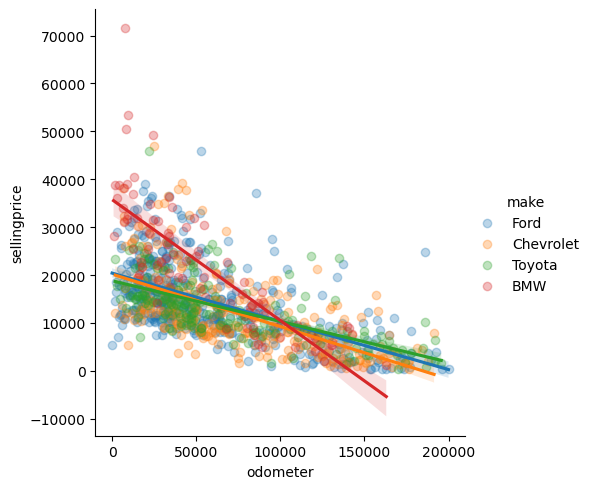

In [9]:
sns.lmplot(
    x="odometer",
    y="sellingprice",
    data=car_brands.query('sellingprice <150000 and odometer < 200000').sample(1000),
    hue="make",
    scatter_kws={'alpha':.3},
)

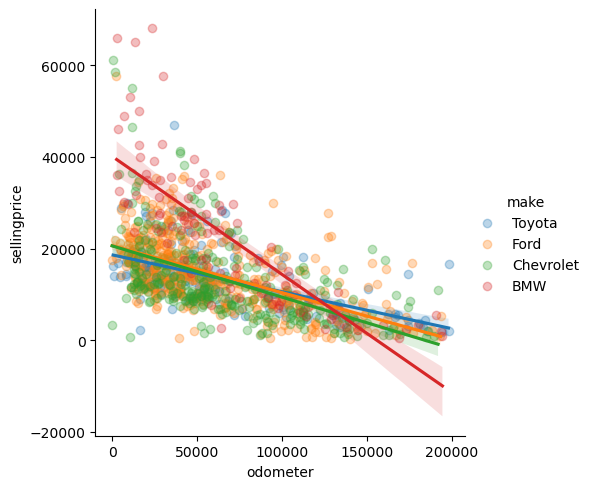

In [10]:
#first run through missed the "and sellingprice <150000 and odometer < 200000").sample(1000)"
brand_list = ['Ford', 'BMW', 'Toyota', 'Chevrolet']

sns.lmplot(
    x="odometer",
    y="sellingprice",
    data=cars.query("make in @brand_list and sellingprice <150000 and odometer < 200000").sample(1000),
    hue="make",
    scatter_kws={'alpha':.3},
)

In [11]:
import scipy.stats as stats

cars_regress = cars.dropna()

stats.linregress(x=cars_regress["odometer"], y=cars_regress["sellingprice"])

LinregressResult(slope=-0.10686305954841509, intercept=20818.284085956468, rvalue=-0.57738498191986, pvalue=0.0, stderr=0.00021987650761310995, intercept_stderr=18.587962282863682)

In [12]:
#using my  car_brands dataframe
stats.linregress(x=car_brands["odometer"], y=car_brands["sellingprice"])

LinregressResult(slope=-0.10324694481843912, intercept=21106.683488609964, rvalue=-0.5767758606971323, pvalue=0.0, stderr=0.00033727168833970245, intercept_stderr=28.878877210494284)

In [13]:
#didn't grasp this at first(still not sure I do...)
for brand in brand_list:
    data = cars_regress.loc[cars_regress["make"] == brand]
    print(f"{brand}: {stats.linregress(data['odometer'], data['sellingprice'])[0:2]}")

Ford: (-0.09953734771818878, 20840.011075886516)
BMW: (-0.22250330429676327, 35567.979744684795)
Toyota: (-0.07594777614361672, 17813.017107685304)
Chevrolet: (-0.08841045962774956, 18705.58735748506)


# Categorical Variable Relationships

* Bin the `condition` variable into increments of .5. For example, the first bin will be '1-1.5', the second '1.5-2', and so on up until the maximum condition value of 5. Use pd.cut() to create the bins.

* Build a barplot of the average price by condition bin.

<Axes: xlabel='condition_bins', ylabel='sellingprice'>

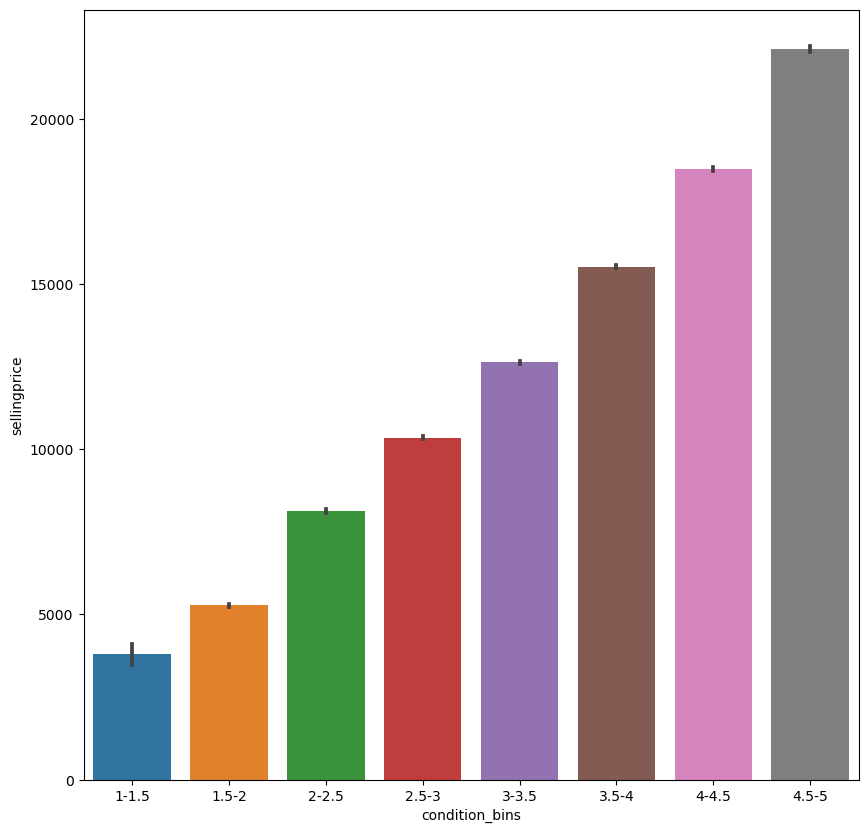

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

bins = np.linspace(1, 5, 9)
labels = ["1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]

#adding column based on condition bins
cars["condition_bins"]=pd.cut(cars["condition"],bins=bins,labels=labels)

sns.barplot(
    x="condition_bins",
    y="sellingprice",
    data=cars,
#     errorbar=None
)
    

# Price by make and condition

* Create a pivot table with the top 10 most common car brands `make` column as rows, and condition bins as columns. The values in the table should be the average selling price for each make/condition combination. Consider using value_counts to get the top 10 most common brands.

* Once you've created the table, build a heatmap from the data. Which brands and quality levels have the highest selling prices? Does this match your expecations?

In [15]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),4.5-5
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),4.5-5
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),4-4.5
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),4-4.5
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),4-4.5


In [16]:
cars_pivot = cars.pivot_table(index='make',
                             columns="condition_bins",
                             values="sellingprice",
                             aggfunc="mean")

cars_pivot#this had all cars in it, forgot to drop to top 10

condition_bins,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
make,,,,,,,,
Acura,900.000000,5523.943662,9190.614618,11266.517857,14492.102397,17799.131190,21264.681296,25250.000000
Aston Martin,NaN,NaN,NaN,42700.000000,58100.000000,58928.571429,51080.000000,61000.000000
Audi,2175.000000,7509.423077,11340.520629,12909.820359,16810.563380,21830.169340,28029.584041,34647.032641
BMW,4326.923077,6848.680865,10478.320029,12795.277669,16397.610281,21911.286118,28791.890310,35902.992693
Bentley,43000.000000,47362.500000,64125.000000,60300.000000,63088.636364,76232.000000,83705.882353,89321.428571
...,...,...,...,...,...,...,...,...
subaru,NaN,2702.941176,3150.000000,4558.333333,8000.000000,5133.333333,6200.000000,NaN
suzuki,NaN,NaN,3500.000000,NaN,NaN,8850.000000,NaN,NaN
toyota,NaN,2595.652174,5933.333333,10144.761905,12962.500000,9571.428571,16307.142857,17800.000000


In [17]:
#Needed to locate the top 10
top10 = cars["make"].value_counts().iloc[:10].index #this is not a dataframe, but creates a list

#then refer to the top10
cars_pivot = cars.loc[cars["make"].isin(top10)].pivot_table(index='make',
                             columns="condition_bins",
                             values="sellingprice",
                             aggfunc="mean")

cars_pivot


condition_bins,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
make,,,,,,,,
BMW,4326.923077,6848.680865,10478.320029,12795.277669,16397.610281,21911.286118,28791.890310,35902.992693
Chevrolet,3021.031746,5384.030601,7425.967945,10325.668781,11622.675195,14436.514288,16733.687841,21580.124553
Chrysler,2354.545455,4301.224656,5367.031437,9077.602013,9247.621069,14813.315207,15212.500990,18388.446281
Dodge,4094.907407,5299.306603,7127.988641,9840.543230,10517.710952,14051.693213,14893.500000,18400.000000
Ford,4175.866667,5282.734146,8550.886379,10954.656807,13394.647490,15374.553012,17820.920366,20810.886556
Honda,5418.181818,5013.392857,7924.010577,9179.641598,11618.430007,13724.741442,16415.864917,19317.726330
Hyundai,3089.285714,5124.115218,7283.134792,8600.312323,10312.067568,11704.661821,13483.934264,16502.773497
Kia,4710.000000,4208.728571,6639.857005,8147.949483,10236.522039,11998.424662,13986.038947,16246.605411
Nissan,4592.682927,5509.596553,8431.096744,10016.940794,11893.454024,13056.597333,14654.276116,16105.622175


Text(0.5, 1.0, 'Avg. Selling Price by Make and Quality')

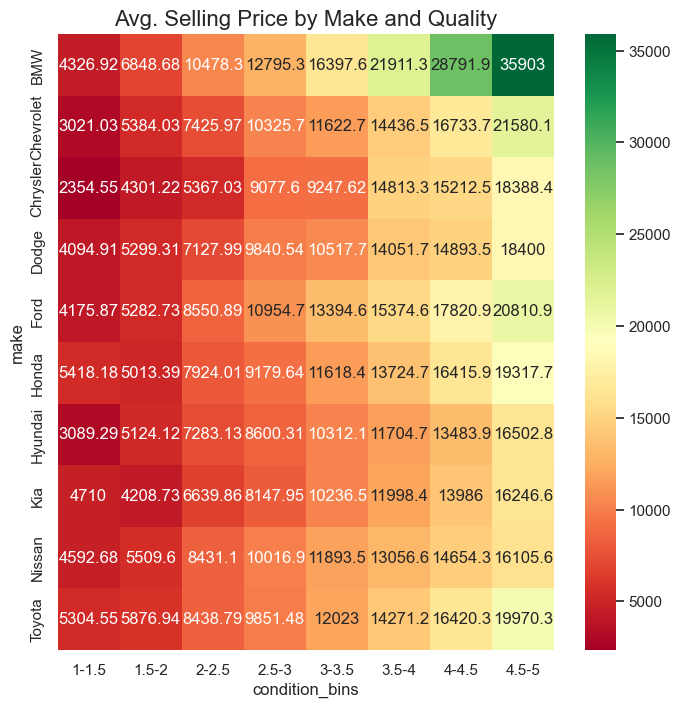

In [18]:
sns.set(rc={'figure.figsize':(8,8)})

sns.heatmap(cars_pivot,
           annot=True, #adds values to squares
           fmt="g", #takes it out of scientific notation
           cmap="RdYlGn" #gives color choice
)

plt.title("Avg. Selling Price by Make and Quality", fontsize=16)

# Ford F-150 Deep Dive

Our client is mostly interested in purchasing work trucks - specifically the Ford F-150, the highest selling automobile for decades in the US. 

* Filter your data down to rows where `model` is "F-150".
* Then build a histogram of sellingprice with 10 bins. 

In [19]:
f150s = cars[cars["model"] == "F-150"]

f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3-3.5
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4-4.5


<Axes: xlabel='sellingprice', ylabel='Count'>

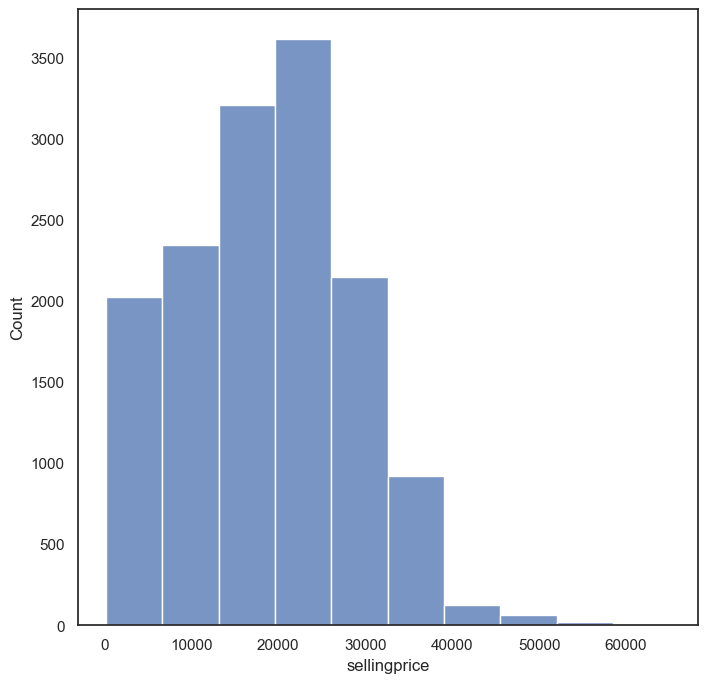

In [20]:
sns.set_style("white")
sns.histplot(x="sellingprice", data=f150s, bins=10)

* Build a barplot of `sellingprice` by `trim` for the F150s.

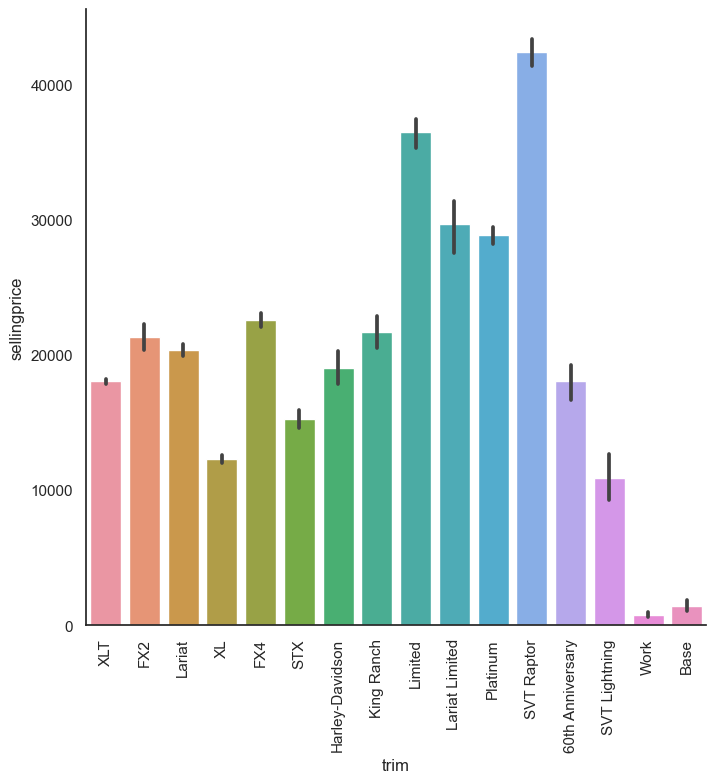

In [21]:
sns.barplot(x="trim",
           y="sellingprice",
           data=f150s,
           )

plt.xticks(rotation=90)

sns.despine();

* Filter the dataset down to the trim levels ["XL", "XLT", "Platinum", "SVT Raptor"].

* Then, build a jointplot of `condition` (not binned) by `sellingprice`.

In [22]:
trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']

f150s4 = f150s.query('trim in @trim_list')

f150s4.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3-3.5
1095,2012,Ford,F-150,XL,Regular Cab,NaN,1ftmf1cm6ckd43568,ca,3.5,51851.0,white,gray,aaero sweet company,11950,12800,Thu Dec 18 2014 11:30:00 GMT-0800 (PST),3-3.5
2001,2011,Ford,F-150,XL,SuperCab,automatic,1ftex1em5bfc39949,ca,3.6,91626.0,white,gray,"enterprise fleet management exchange, inc.",14800,13300,Fri Dec 26 2014 15:00:00 GMT-0800 (PST),3.5-4


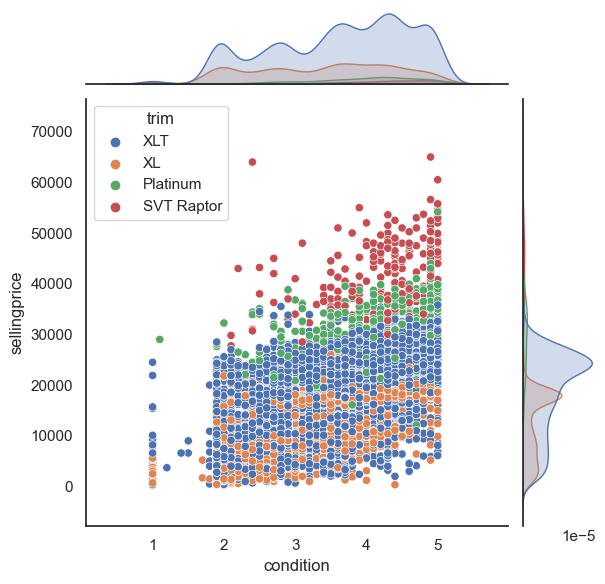

In [23]:
sns.jointplot(x="condition",
             y="sellingprice",
             hue="trim",
             data=f150s4)


In [24]:
sns.plotting_context() #to see what is used for the plot

{'font.size': 12.0,
 'axes.labelsize': 12.0,
 'axes.titlesize': 12.0,
 'xtick.labelsize': 11.0,
 'ytick.labelsize': 11.0,
 'legend.fontsize': 11.0,
 'legend.title_fontsize': 12.0,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0}

### Are there any "Deals"?

Ok, thanks to the charts above we're getting closer to honing in on the trucks to purchase.

* Create a column `diff_to_mmr` which is the difference between `sellingprice` and `mmr`.
* Then build a barplot looking at mean `diff_to_mmr` by `color`.
* Which color sells for more than the recommended price?

In [25]:
f150s4 = f150s4.assign(diff_to_mmr = f150s4["sellingprice"]-f150s4["mmr"])

f150s4.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins,diff_to_mmr
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5,500
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4,2500
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3-3.5,600
1095,2012,Ford,F-150,XL,Regular Cab,NaN,1ftmf1cm6ckd43568,ca,3.5,51851.0,white,gray,aaero sweet company,11950,12800,Thu Dec 18 2014 11:30:00 GMT-0800 (PST),3-3.5,850
2001,2011,Ford,F-150,XL,SuperCab,automatic,1ftex1em5bfc39949,ca,3.6,91626.0,white,gray,"enterprise fleet management exchange, inc.",14800,13300,Fri Dec 26 2014 15:00:00 GMT-0800 (PST),3.5-4,-1500


In [26]:
f150s = f150s.assign(diff_to_mmr = f150s["sellingprice"]-f150s["mmr"])

f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins,diff_to_mmr
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5,500
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5,3800
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4,2500
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3-3.5,600
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4-4.5,-700


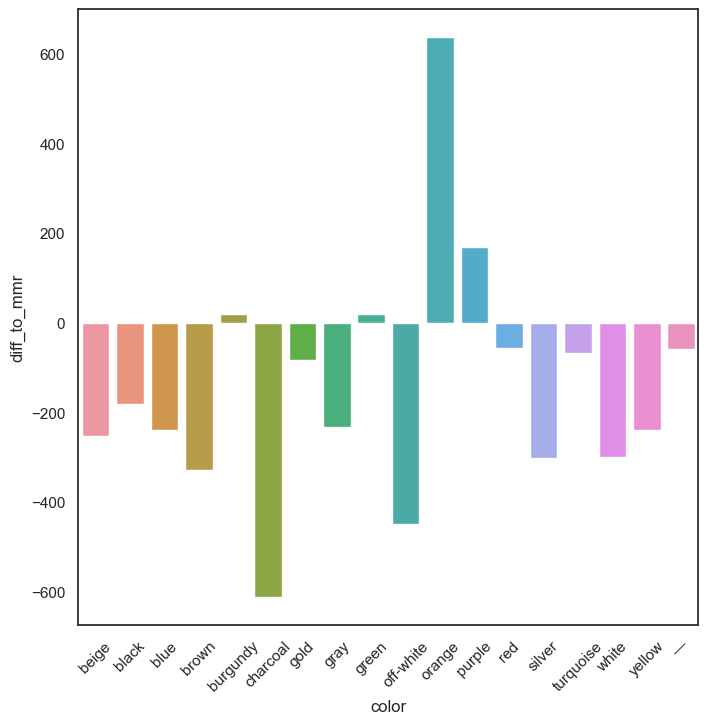

In [27]:
sns.barplot(x="color",
           y="diff_to_mmr",
           data=f150s4.sort_values(by="color"),
           errorbar=None,
           
           )
plt.xticks(rotation=45);

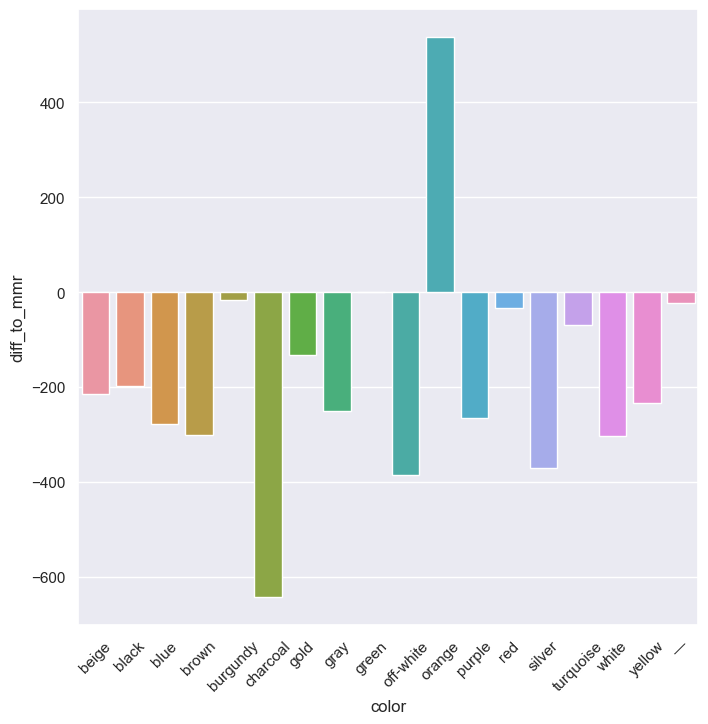

In [28]:
sns.set_style("darkgrid")
sns.barplot(x="color",
           y="diff_to_mmr",
           data=f150s.sort_values(by="color"),
           errorbar=None,
           
           )
plt.xticks(rotation=45);

* Further filter the data to the trims below. Exclude the color 'orange' and look only at trucks from years between 2009 and 2014. 

In [29]:
f150s4_nrw=f150s4.query("color != 'orange'")

f150s_pivot = f150s4_nrw.loc[f150s4_nrw["year"]
    .between(2009,2014)].pivot_table(index="trim",
                columns="condition_bins",
                values={"sellingprice":"mean"})
f150s_pivot.head()

sellingprice                                            \
condition_bins        1-1.5         1.5-2         2-2.5         2.5-3   
trim                                                                    
Platinum            29000.0  25570.000000  25294.117647  23875.555556   
SVT Raptor              NaN           NaN  37583.333333  36392.857143   
XL                      NaN   8006.250000  12007.770270  12852.358974   
XLT                     NaN  15420.614035  16820.263158  18762.219828   

                                                                        
condition_bins         3-3.5         3.5-4         4-4.5         4.5-5  
trim                                                                    
Platinum        26917.796610  26883.152174  29517.808219  33677.631579  
SVT Raptor      36546.666667  40131.428571  42566.949153  45947.619048  
XL              15388.942308  16119.674556  17494.629156  18528.623188  
XLT             20110.634328  21281.357759  23204.475831  25061.060065

<Axes: xlabel='None-condition_bins', ylabel='trim'>

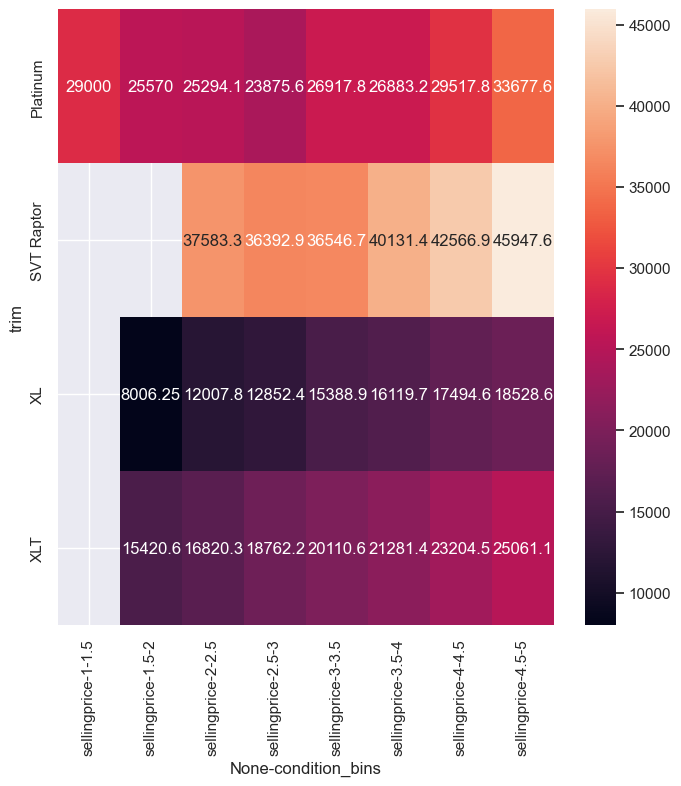

In [30]:
sns.heatmap(f150s_pivot,
           annot=True,
           fmt="g")

### Best state to buy trucks in?

* Ok, we've decided on the XLT model, it has more features than XL but is still quite affordable. Also filter out any trucks with a quality of less than 3.5. Your DataFrame should only have trucks with a quality of 3.5 or greater.
* Build a subplot with a bar chart of `state` by `diff_to_mmr` and `state` by `count` to find which states sell XLT models below mmr and have ample quantity.

<Axes: xlabel='state', ylabel='auto_count'>

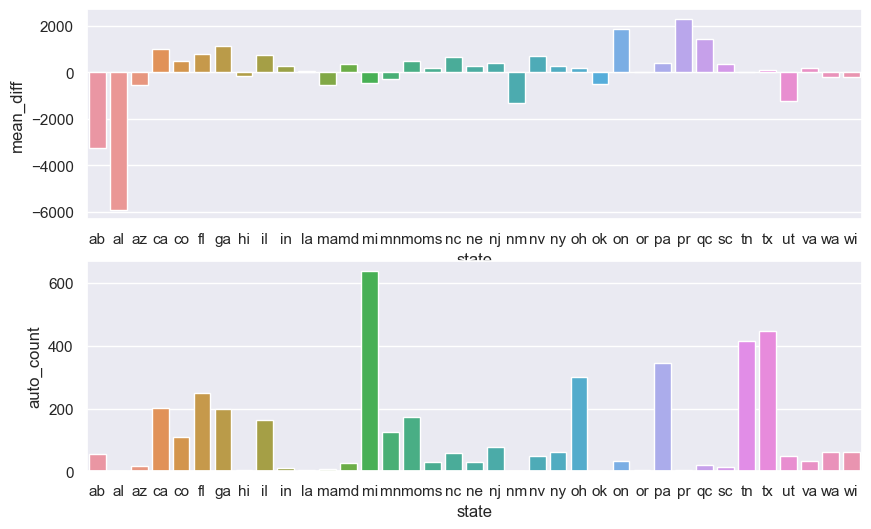

In [31]:
# filter out any trucks that are the XLT model and with a quality of less than 3.5 
f150s_XLT=(f150s4_nrw
            .query("trim == 'XLT' and condition >= 3.5")
            .groupby(["state"], as_index=False)
              .agg(mean_diff=("diff_to_mmr", "mean"),
                  auto_count=("diff_to_mmr", "count"))
          )
fig, ax =plt.subplots(2, figsize = (10,6))

sns.barplot(x="state",
           y="mean_diff",
           data=f150s_XLT,
           ax=ax[0]
           )

sns.barplot(x="state",
           y="auto_count",
           data=f150s_XLT,
           ax=ax[1]
           )

* Ok, looks like Utah (our client has an office nearby) has a good amount of quantity and a low average price. Take a look at the average diff_to_mmr and count of cars by saledate - feel free to return just a table. 

In [32]:
f150s.query("trim=='XLT' and state == 'ut' and condition > 3.5").groupby("saledate").agg({"diff_to_mmr":["mean",
                                                                                                         "count"]})

diff_to_mmr      
                                                mean count
saledate                                                  
Wed Feb 04 2015 03:30:00 GMT-0800 (PST) -1400.000000     2
Wed Feb 11 2015 03:30:00 GMT-0800 (PST) -1605.000000    10
Wed Feb 18 2015 03:30:00 GMT-0800 (PST)  -542.857143     7
Wed Feb 25 2015 03:30:00 GMT-0800 (PST)  -950.000000     4
Wed Jan 07 2015 11:30:00 GMT-0800 (PST) -2325.000000     2
Wed Jan 21 2015 03:30:00 GMT-0800 (PST)  -900.000000     2
Wed Jun 17 2015 04:30:00 GMT-0700 (PDT) -2120.000000     5
Wed Mar 04 2015 03:30:00 GMT-0800 (PST)  -600.000000     5

# $\color{red}{\text{Stopped here...}}$